<a href="https://colab.research.google.com/github/anandaditya07/ML_LAB/blob/main/Experimet_7_Titanic_rescue_prediction_using_Decision_Tree_And_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experimet 7 : Titanic rescue prediction using Decision Tree And  Random Forest**


In [5]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

#### **PART 1: Data Handling**

In [6]:
data=pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Using drop function to exclude collums I won't need. The parameter inplace true will change the table
data.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [10]:
# To define X I can simply drop the collumn I don't need, which is the Y
# Here I am not using the parameter inplace, thus it is automaticaly set as "False" and doesn't change the table
X = data.drop(["Survived"],axis="columns")
# For the variable Y I can simply select the column Survived
Y = data["Survived"] #Another way to declare: Y = data.Survived
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [11]:
#The next step: create a pattern
#Pattern: Male = 0 / Female = 1
#This method map will create synonims in a dictionary
X.Sex = X.Sex.map({"male":0,"female":1})
X.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [12]:
#Some filles with the ages are empy. Checkin out the first 10 lines
X.Age[0:10]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [13]:
# To fix this, we will use method fillna(). Inside the brackets I'll put the information to replace, which will be the mean
X.Age = X.Age.fillna(X.Age.mean())
X.Age[0:10]
#Index 5 was empty and is now showing the mean (29.699118)

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,29.699118
6,54.000000
7,2.000000
8,27.000000
9,14.000000


In [14]:
#Now want data to training (80%) and testing (20%)
#Sklearn has a method to automaticaly make this division"train_test_split"
#Parameters: X, Y, percentage. If I put one, the method will automaticaly calculate the other
train_test_split(X,Y,train_size = 0.8) # It is automaticaly setting 0.2 for testing
# The table will show X_training [712 rows x 3 columns], X_test [179 rows x 3 columns], Y_training[Length: 712, Y_test[Length: 179]

[     Pclass  Sex        Age
 110       1    0  47.000000
 814       3    0  30.500000
 445       1    0   4.000000
 37        3    0  21.000000
 199       2    1  24.000000
 ..      ...  ...        ...
 331       1    0  45.500000
 530       2    1   2.000000
 343       2    0  25.000000
 253       3    0  30.000000
 481       2    0  29.699118
 
 [712 rows x 3 columns],
      Pclass  Sex        Age
 207       3    0  26.000000
 485       3    1  29.699118
 18        3    1  31.000000
 410       3    0  29.699118
 744       3    0  31.000000
 ..      ...  ...        ...
 575       3    0  19.000000
 124       1    0  54.000000
 558       1    1  39.000000
 734       2    0  23.000000
 409       3    1  29.699118
 
 [179 rows x 3 columns],
 110    0
 814    0
 445    1
 37     0
 199    0
       ..
 331    0
 530    1
 343    0
 253    0
 481    0
 Name: Survived, Length: 712, dtype: int64,
 207    1
 485    0
 18     0
 410    0
 744    1
       ..
 575    0
 124    0
 558    1
 734  

In [15]:
# Now I create 4 variables to place each parameter
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)
#to see the lenght:
len(X_train)

712

In [16]:
len(X_test)

179

In [17]:
#Note that X_test is not in order. It presents it ramdomly to prevent model from becoming biased
X_test

,Pclass,Sex,Age
147,3,1,9.000000
25,3,1,38.000000
525,3,0,40.500000
554,3,1,22.000000
676,3,0,24.500000
...,...,...,...
142,3,1,24.000000
518,2,1,36.000000
787,3,0,8.000000
533,3,1,29.699118


## **Data Analysis**  
* **Decision Tree**
* **Random Forest**

## **1. Decision Tree**   

In [18]:

model_dt = tree.DecisionTreeClassifier(max_depth=3)   #model with deph 3
model_dt

DecisionTreeClassifier(max_depth=3)

In [19]:
#Now the method fit will adjust data, trainning the model
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
#Using predict method to test the model
model_dt.predict(X_test) #always gets x and retuns y

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1])

In [21]:
#Storing the result in a variable
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1])

In [22]:
#Dataframe to show Y real and Y predicted:
#Using a dictionary to separate columns
result = pd.DataFrame({"Survided REAL": Y_real, "Survived PREDICTION": Y_pred_dt})
result

,Survided REAL,Survived PREDICTION
147,0,1
25,1,0
525,0,0
554,1,1
676,0,0
...,...,...
142,1,1
518,1,1
787,0,0
533,1,1


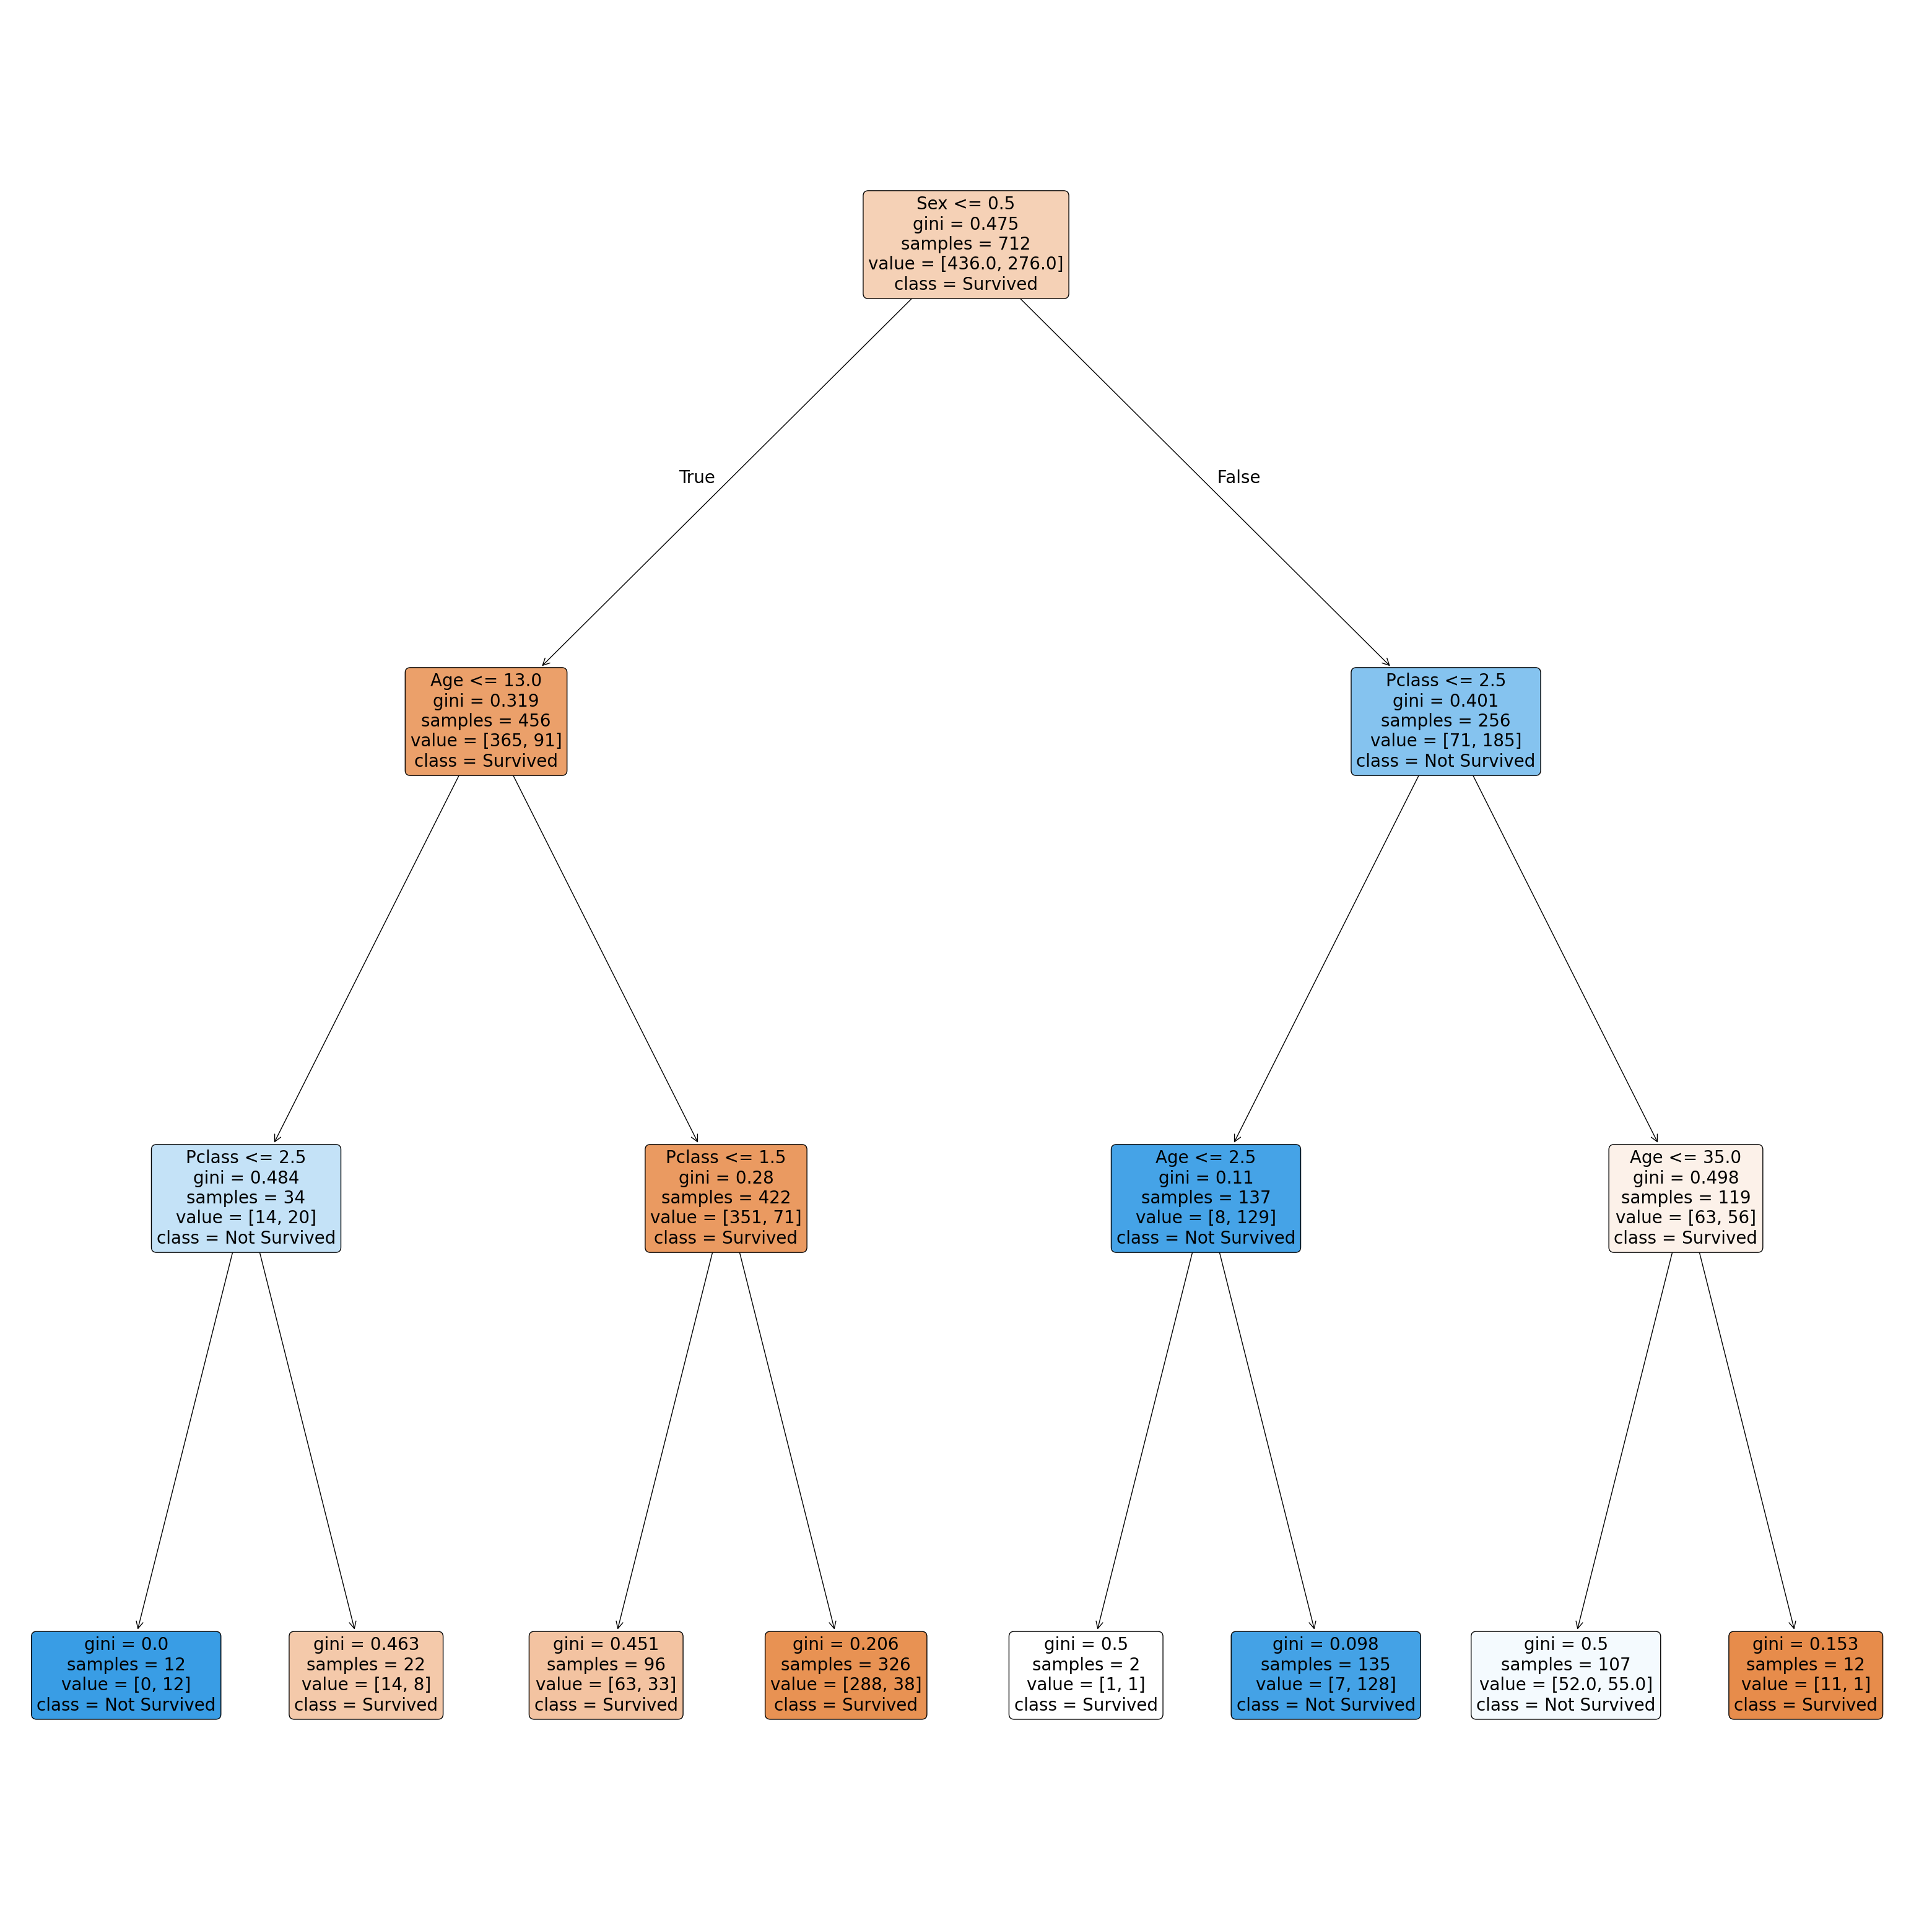

In [23]:
# Plotting the tree
plt.figure(figsize=(40,40))
graph_tree = plot_tree (model_dt,feature_names = ['Pclass','Sex','Age'],
                        class_names = ['Survived','Not Survived'],
                        filled=True,rounded=True,fontsize = 20)

 #### **Decision Tree - Performance Measurement**

#### **a) Accuracy**

In [24]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_dt = model_dt.score(X_test,Y_real)
accuracy_dt

0.8379888268156425

In [25]:
# Here is another way to find the accuracy score
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)
accuracy

0.8379888268156425

#### **b) Precision**

In [26]:
# Precision = true positive / true positive + false positive
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)
precision_dt

0.8363636363636363

#### **c) Recall**

In [27]:
# Recall = true positive / true positive + false negative
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)
recall_dt

0.696969696969697

#### **d) Confusion matrix**

In [28]:
import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt

array([[104,   9],
       [ 20,  46]])

<Axes: >

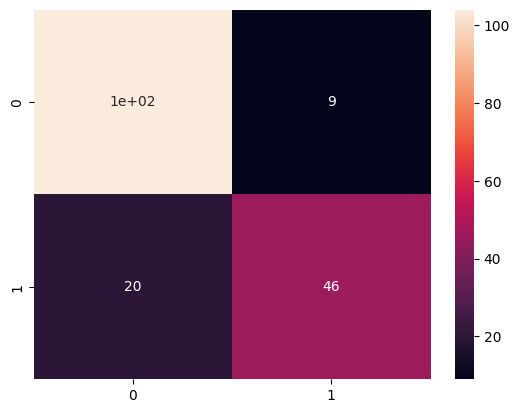

In [29]:
# 0,0: 53 => True Negative
# 0,1: 0  => False Positive
# 1,0: 23 => False Negative
# 1,1: 4  => True Positive
sns.heatmap(confusion_matrix_dt, annot=True)

## **2. Random Forest**  

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model_rf = RandomForestClassifier().fit(X_train,Y_train)

In [35]:
y_pred_forest = model_rf.predict(X_test)
y_pred_forest

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1])

#### **Random Forest - Performance Measurement**

#### **a) Accuracy**

In [36]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_forest = model_rf.score(X_test,Y_real)
accuracy_forest

0.7988826815642458

In [37]:
# Here is another way to find the accuracy score
accuracy_forest = metrics.accuracy_score(Y_real,y_pred_forest)
accuracy_forest

0.7988826815642458

#### **b) Precision**

In [38]:
# Precision = true positive / true positive + false positive
precision_forest = metrics.precision_score(Y_real,y_pred_forest)
precision_forest

0.7205882352941176

#### **c) Recall**

In [39]:
# Recall = true positive / true positive + false negative
recall_forest = metrics.recall_score(Y_real, y_pred_forest)
recall_forest

0.7424242424242424

#### **d) Confusion matrix**

In [40]:
cm_forest = metrics.confusion_matrix(Y_real,y_pred_forest)
cm_forest

array([[94, 19],
       [17, 49]])

<Axes: >

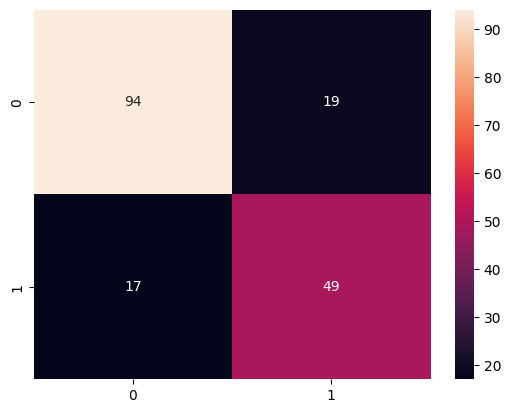

In [41]:
sns.heatmap(cm_forest, annot=True)

#### **e) AUC - Roc Curve**

In [42]:
auc_forest = metrics.roc_auc_score(Y_real, y_pred_forest) # as the documentation explain, the main parameters are: y_true and y_score
auc_forest

np.float64(0.7871413247519442)

#### **Random Forest - k-Fold Cross-Validation**
##### Now using kfold, a model validation technique which is not using my pre-trained model

In [43]:
kf_forest = KFold(n_splits=5,shuffle=True)

In [44]:
cv_forest = cross_val_score(model_rf, X, Y, cv=kf_forest)
np.mean(cv_forest)

np.float64(0.808097420124286)

#### **Valuation Analysis**

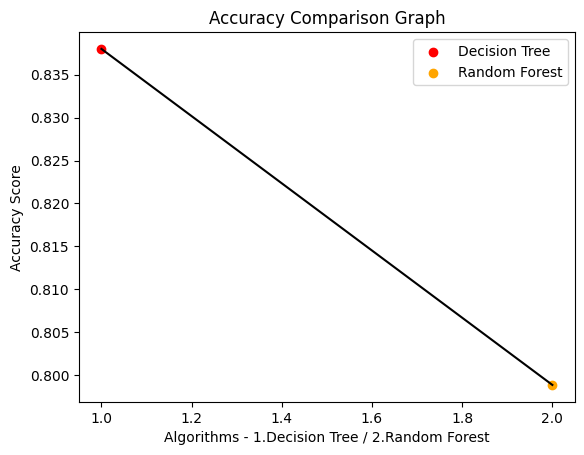

In [45]:
plt.title("Accuracy Comparison Graph")
plt.ylabel("Accuracy Score")
plt.xlabel("Algorithms - 1.Decision Tree / 2.Random Forest")
y = [accuracy_dt,accuracy_forest]
plt.plot([1,2],y, color = "black")
plt.scatter(1,accuracy_dt, marker="o", color="red", label="Decision Tree")
plt.scatter(2,accuracy_forest, marker="o", color = "orange",label = "Random Forest")
plt.legend()
plt.show()